Presentado por: Laura López

# Regresión lineal

## Importar librerías

In [122]:
#Procesamiento
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

#Modelos
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.stats.api as sms
import scipy as sp

%matplotlib inline
pd.options.display.max_columns = None

## Cargar datos

In [123]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [124]:
data.shape

(21613, 21)

## Información del dataframe:

[Fuentes de datos](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/)

- id:	Identification
- date:	Date sold
- price:	Sale price
- bedrooms:	Number of bedrooms
- bathrooms:	Number of bathrooms
- sqft_liv:	Size of living area in square feet
- sqft_lot:	Size of the lot in square feet
- floors:	Number of floors
- waterfront:	‘1’ if the property has a waterfront, ‘0’ if not.
- view:	An index from 0 to 4 of how good the view of the property was
- condition:	Condition of the house, ranked from 1 to 5
- grade:	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty
- sqft_above:	Square feet above ground
- sqft_basmt:	Square feet below ground
- yr_built:	Year built
- yr_renov:	Year renovated. ‘0’ if never renovated 
- zipcode:	5 digit zip code
- lat:	Latitude
- long:	Longitude
- squft_liv15:	Average size of interior housing living space for the closest 15 houses, in square feet
- squft_lot15:	Average size of land lots for the closest 15 houses, in square feet
- Shape_leng:	Polygon length in meters
- Shape_Area:	Polygon area in meters

__Objetivo__

Price


In [125]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [126]:
data.describe(include='O')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [127]:
data[data.duplicated(['id'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [128]:
test = data.groupby('id', as_index=False).first()
test[test.duplicated(['id'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [129]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,1200019,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
2,1200021,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
3,2800031,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320
4,3600057,20150319T000000,402500.0,4,2.00,1650,3504,1.0,0,0,3,7,760,890,1951,2013,98144,47.5803,-122.294,1480,3504


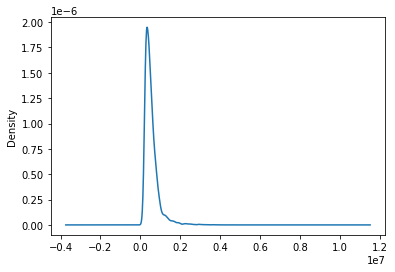

In [130]:
test.price.plot(kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


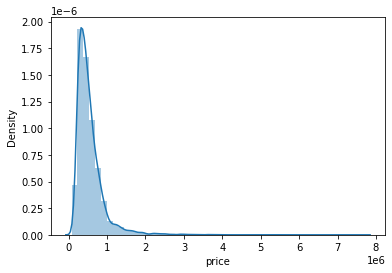

In [131]:
sns.distplot(test.price);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


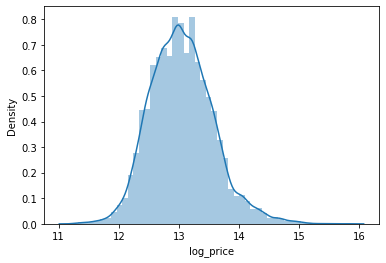

In [132]:
#Se observa un sesgo a la izquierda de la variable price
test['log_price']= np.log(test['price'])
sns.distplot(test.log_price);

In [133]:
#Se decide usar la columna nueva de precio
del test['price']

In [134]:
#Cambiar tipo de dato a la columna fecha
test['date'] = pd.to_datetime(test['date'],format='%Y-%m-%d %H:%M')
test.head() 

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,1000102,2014-09-16,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,12.542545
1,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,13.380874
2,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,12.899220
3,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,12.367341
4,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,7,760,890,1951,2013,98144,47.5803,-122.294,1480,3504,12.905450


In [135]:
# Eliminar columnas de fecha porque no aportan mucho al análisis que se quiere realizar
test.drop(['date','id','yr_built','yr_renovated'], axis=1, inplace=True) 

Text(0.5, 1.0, 'Correlación')

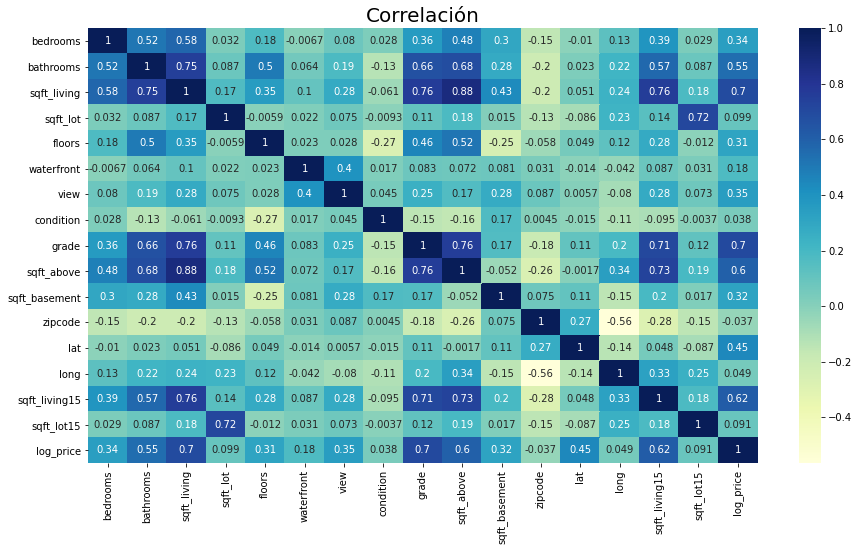

In [136]:
# Análisis de correlación
plt.figure(figsize=(15,8))
sns.heatmap(test.corr(),cmap='YlGnBu',annot=True)
plt.title('Correlación', fontsize = 20)

In [137]:
test.drop(['sqft_living'], axis=1, inplace=True)  #Eliminar por alta correlación

In [138]:
#Visualizar columnas
test.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [139]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21436 entries, 0 to 21435
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21436 non-null  int64  
 1   bathrooms      21436 non-null  float64
 2   sqft_lot       21436 non-null  int64  
 3   floors         21436 non-null  float64
 4   waterfront     21436 non-null  int64  
 5   view           21436 non-null  int64  
 6   condition      21436 non-null  int64  
 7   grade          21436 non-null  int64  
 8   sqft_above     21436 non-null  int64  
 9   sqft_basement  21436 non-null  int64  
 10  zipcode        21436 non-null  int64  
 11  lat            21436 non-null  float64
 12  long           21436 non-null  float64
 13  sqft_living15  21436 non-null  int64  
 14  sqft_lot15     21436 non-null  int64  
 15  log_price      21436 non-null  float64
dtypes: float64(5), int64(11)
memory usage: 2.8 MB


Se observa que todas las columnas son numerica, por lo tento no se requiere transformación a las variables de categoricas a numericas.

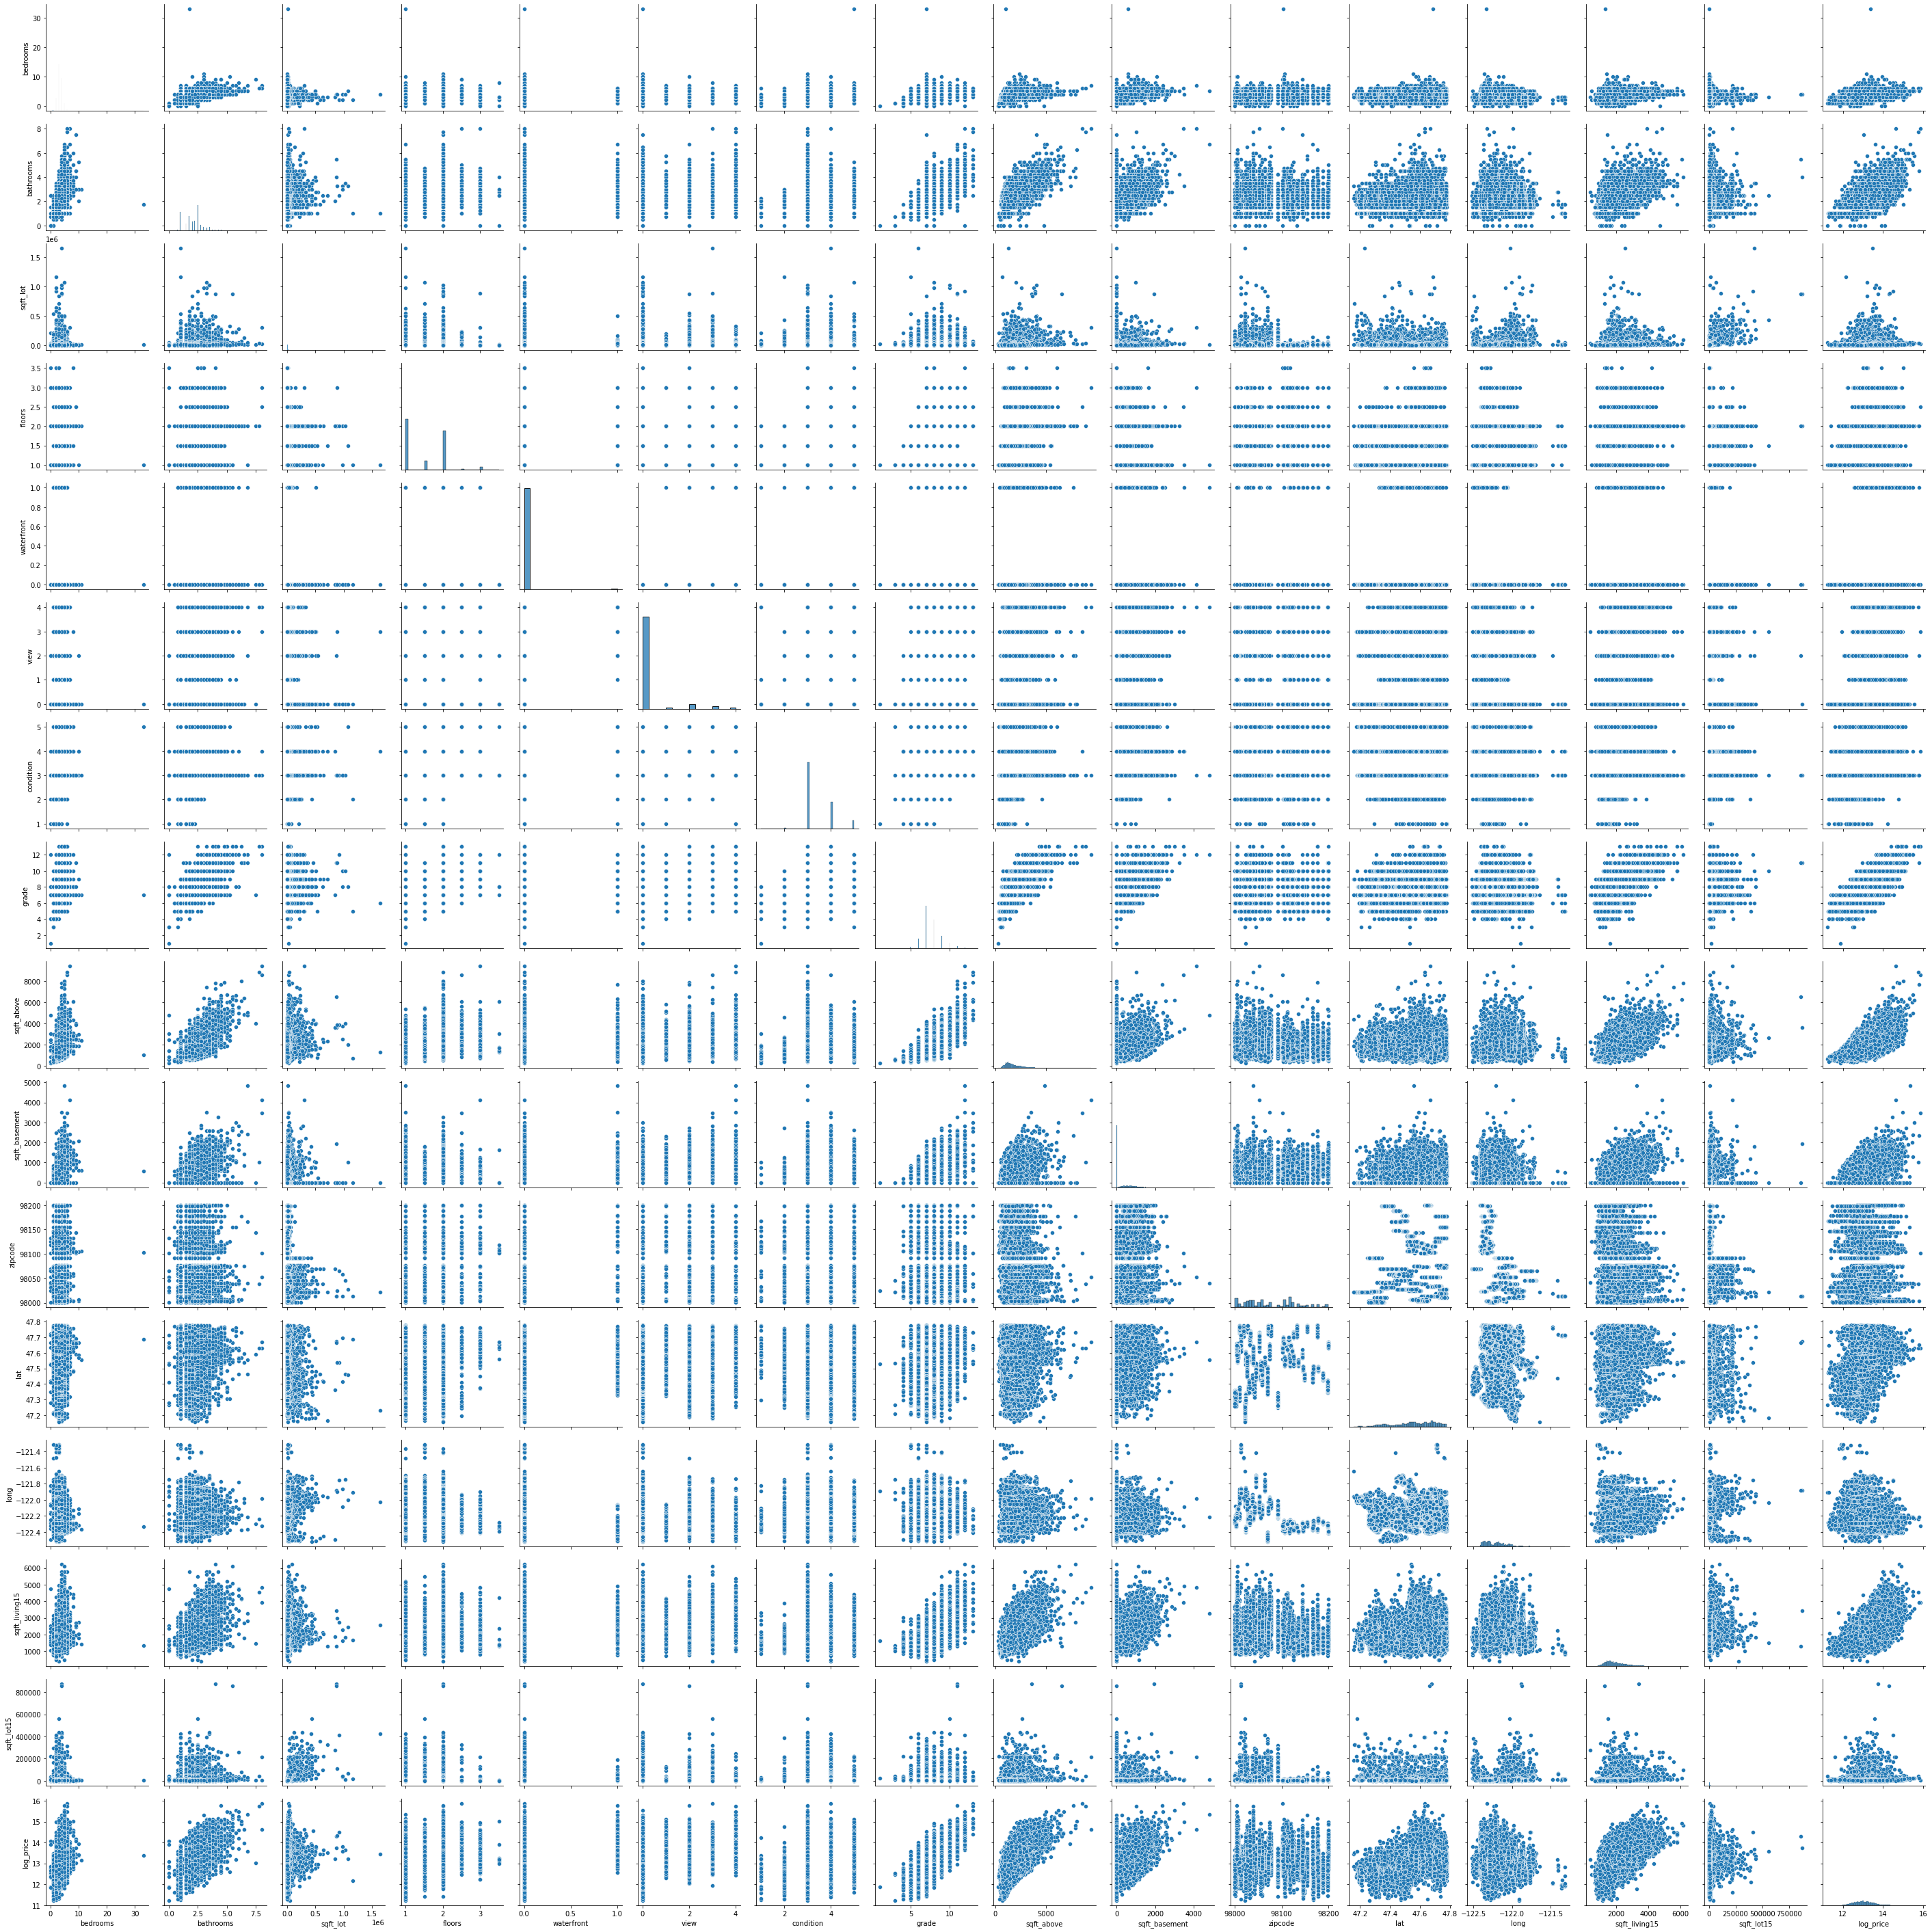

In [140]:
sns.pairplot(test)

## Regresión lineal multiple
la regresión lineal simple puede ser extendida para incluir multiples caracteristicas esto se conoce como **regresión lineal multiple**:

$y = \beta_0 + \beta_1 \times x1 + \beta_2 \times x2 + \beta_3 \times x3 ...$


los parametros beta son llamados coeficientes para predecir.

In [141]:
test.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

# Statsmodels:

In [142]:
#Modelo 1
modelsmf1 = smf.ols(formula='log_price ~  bedrooms + bathrooms  + sqft_lot + grade', data=test).fit()
modelsmf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5616.
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        04:28:32   Log-Likelihood:                -8994.7
No. Observations:               21436   AIC:                         1.800e+04
Df Residuals:                   21431   BIC:                         1.804e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6807      0.018    577.506      0.000      10.644      10.717
bedrooms       0.0392      0.003     12.407      0.000       0.033       0.045
bathrooms      0.0780      0.005     16.357      0.000       0.069       0.087
sqft_lot    2.454e-07   6.09e-08      4.026      0.000    1.26e-07    3.65e-07
grade          0.2697      0.003     93.817      0.000       0.264       0.275
==============================================================================
Omnibus:                      142.472   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.171
Skew:                           0.200   Prob(JB):                     3.00e-32
Kurtosis:                       3.048   Cond. No.                     3.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
#Modelo 2
modelsmf2 = smf.ols(formula='log_price ~  bedrooms + bathrooms + sqft_lot + grade + sqft_living15', data=test).fit()
modelsmf2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     4867.
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        04:28:37   Log-Likelihood:                -8547.6
No. Observations:               21436   AIC:                         1.711e+04
Df Residuals:                   21430   BIC:                         1.716e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.8691      0.019    567.389      0.000      10.832      10.907
bedrooms          0.0245      0.003      7.813      0.000       0.018       0.031
bathrooms         0.0630      0.005     13.406      0.000       0.054       0.072
sqft_lot       7.638e-08   5.99e-08      1.274      0.203   -4.11e-08    1.94e-07
grade             0.2146      0.003     63.986      0.000       0.208       0.221
sqft_living15     0.0002   5.29e-06     30.215      0.000       0.000       0.000
==============================================================================
Omnibus:                       94.203   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.058
Skew:                           0.148   Prob(JB):                     6.20e-21
Kurtosis:                       2.871   Cond. No.                     3.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observando métricas como R2 y AIC - BIC se elige el primer modelo y es el modelo más parciomonioso, es decir, con menor numero de variables.

# sklearn.linear_model:

In [144]:
# create X and y
col = list(test.columns)
feature_cols = col[:-1]
X = test[feature_cols]
y = test.log_price

# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-56.200003230796476
[-7.19066317e-03  2.21894421e-02  5.70468478e-07  3.75465083e-02
  3.84841620e-01  7.23665701e-02  9.49573590e-02  1.35181546e-01
  1.66279501e-04  1.79758809e-04 -4.39139161e-04  1.49731966e+00
 -3.19896849e-01  9.87005442e-05 -2.91934366e-07]


In [145]:
lm.score(X, y)

0.7515475907450011

## Validar supuestos:

In [146]:
pred_val = modelsmf1.fittedvalues.copy()
true_val = test['log_price'].values.copy()
residual = true_val - pred_val

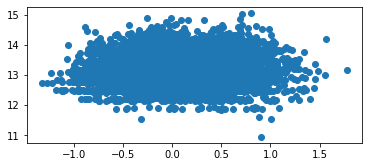

In [147]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residual, pred_val);

In [148]:
# Parametros lineales
sms.linear_harvey_collier(modelsmf1)

LinAlgError: ignored

In [149]:
# Heterocedasticidad
_,pval,__,f_pval=sms.het_breuschpagan(residual,test[['bedrooms', 'bathrooms', 'sqft_lot', 'grade']])
pval, f_pval # Esto indica que existen heterocedasticidad

(0.0, 0.0)

0.997434386303937

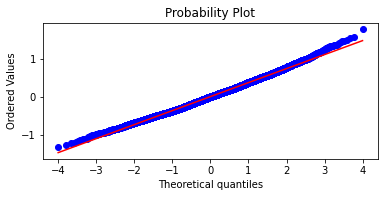

In [150]:
#Normalidad
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2